In [1]:
%load_ext rpy2.ipython

Protocol used by Albertas to make this data: https://benchling.com/anavickas/f/lib_VNejBHt6-protocols/prt_2Bkfh557-meripseq/edit

HIV-1 IIIB Virus


https://aidsreagent.org/reagentdetail.cfm?t=viruses&id=607

We are starting from `fastq` files as raw data: 

## Trimming 

In [ ]:
%%bash 
cd ~/People/Judd/fastq
for f in *_L002_R1_001.fastq.gz; do  
    out=${f/\_S[1-9]*/.trim.fastq.gz}; 
    cutadapt -j 12 -q 15 -m 20 -a NNNAGATCGGAAGAGCACACGTCTGAACTCCAGTCA -o ../trim/$out $f; 
done

## Alignment

Unmmaped reads for each `fastq` file saved for later alignment to HIV genome 

Human genome: `gencode.v28.annotation.gtf`

In [ ]:
%%bash 
STAR --genomeLoad LoadAndExit --genomeDir /rumi/shams/abe/genomes/hg38/
for f in trim/*.fastq.gz;do
    out=${f/.trim.fastq.gz/_};
    out=${out/trim/bam};
    STAR --outSAMtype BAM SortedByCoordinate --readFilesCommand zcat --runThreadN 16 --genomeDir /rumi/shams/abe/genomes/hg38/ --readFilesIn $f --outFileNamePrefix $out --outReadsUnmapped Fastx;
done
STAR --genomeLoad Remove --genomeDir /rumi/shams/abe/genomes/hg38/

Firstly, HIV genome indices created by changing sequence provided by Judd to `.fa` format. It didn't work as we needed gtf file! 

Ok! I'm switching to the [HIV-1 clone pIIIB from USA, complete genome
](https://www.ncbi.nlm.nih.gov/nucleotide/EU541617.1?report=genbank&log$=nuclalign&blast_rank=1&RID=8B8ETWT201R) which is highly matched with Judd's clone (using Blast alignment). Then, I donwloaded `.fa` and `.gff3` format for downstream analysis. 

In [530]:
%%bash 
# make hiv genome indices 
bowtie2-build HIV/EU541617.1/EU541617.1.fasta HIV/EU541617.1/index
# Aligning to hiv genome 
for f in fastq_unmapped/*; do
	o=${f/.fastq/.bam};
 	o=${o/fastq_unmapped/bam};
 	bowtie2 --sensitive -N 1 -x HIV/EU541617.1/index -U $f | samtools sort -o $o;
done

Settings:
  Output files: "HIV/EU541617.1/index.*.bt2"
  Line rate: 6 (line is 64 bytes)
  Lines per side: 1 (side is 64 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Max bucket size: default
  Max bucket size, sqrt multiplier: default
  Max bucket size, len divisor: 4
  Difference-cover sample period: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  HIV/EU541617.1/EU541617.1.fasta
Reading reference sizes
  Time reading reference sizes: 00:00:00
Calculating joined length
Writing header
Reserving space for joined string
Joining reference sequences
  Time to join reference sequences: 00:00:00
bmax according to bmaxDivN setting: 2315
Using parameters --bmax 1737 --dcv 1024
  Doing ahead-of-time memory usage test
  Passed!  Constructing with these parameters: --bmax 1737 --dcv 1024
Constructing suffix-array eleme

Building a SMALL index
688648 reads; of these:
  688648 (100.00%) were unpaired; of these:
    415414 (60.32%) aligned 0 times
    272744 (39.61%) aligned exactly 1 time
    490 (0.07%) aligned >1 times
39.68% overall alignment rate
4894526 reads; of these:
  4894526 (100.00%) were unpaired; of these:
    4751738 (97.08%) aligned 0 times
    140319 (2.87%) aligned exactly 1 time
    2469 (0.05%) aligned >1 times
2.92% overall alignment rate
[bam_sort_core] merging from 1 files and 1 in-memory blocks...
705564 reads; of these:
  705564 (100.00%) were unpaired; of these:
    392133 (55.58%) aligned 0 times
    312870 (44.34%) aligned exactly 1 time
    561 (0.08%) aligned >1 times
44.42% overall alignment rate
10022948 reads; of these:
  10022948 (100.00%) were unpaired; of these:
    9922480 (99.00%) aligned 0 times
    99302 (0.99%) aligned exactly 1 time
    1166 (0.01%) aligned >1 times
1.00% overall alignment rate
[bam_sort_core] merging from 2 files and 1 in-memory blocks...
577656

All `bam`  files (mapped to human genome or hiv genome) renamed in this format: 
> `<sample>.<species>.<treatment>.<input/m6A>.bam`

In [531]:
%%R
list.files('bam')

 [1] "s23.hiv.METTL14.input.bam"       "s23.hiv.METTL14.input.bam.bai"  
 [3] "s23.hiv.METTL14.m6A.bam"         "s23.hiv.METTL14.m6A.bam.bai"    
 [5] "s23.hiv.METTL3.input.bam"        "s23.hiv.METTL3.input.bam.bai"   
 [7] "s23.hiv.METTL3.m6A.bam"          "s23.hiv.METTL3.m6A.bam.bai"     
 [9] "s23.hiv.NT.input.bam"            "s23.hiv.NT.input.bam.bai"       
[11] "s23.hiv.NT.m6A.bam"              "s23.hiv.NT.m6A.bam.bai"         
[13] "s23.hiv.Virma.input.bam"         "s23.hiv.Virma.input.bam.bai"    
[15] "s23.hiv.Virma.m6A.bam"           "s23.hiv.Virma.m6A.bam.bai"      
[17] "s23.hiv.WTAP.input.bam"          "s23.hiv.WTAP.input.bam.bai"     
[19] "s23.hiv.WTAP.m6A.bam"            "s23.hiv.WTAP.m6A.bam.bai"       
[21] "s23.human.METTL14.input.bam"     "s23.human.METTL14.input.bam.bai"
[23] "s23.human.METTL14.m6A.bam"       "s23.human.METTL14.m6A.bam.bai"  
[25] "s23.human.METTL3.input.bam"      "s23.human.METTL3.input.bam.bai" 
[27] "s23.human.METTL3.m6A.bam"        "s23.human.M

# Peakcalling 

## Control

Comparing to RADAR package, exomepeak also claculate coverage for only non threted samples. We used different conda `environment` for exomepeak (and it takes long time to run!!). 

In [ ]:
library(exomePeak)
txdb <- makeTxDbFromGFF('/rumi/shams/genomes/hg38/gencode.v28.annotation.gtf',organism='Homo sapiens')
setwd("/rumi/shams/abe/People/Judd/bam")
print (txdb)
res <- exomepeak(
    TXDB=txdb,
    IP_BAM=list.files(pattern='human.NT.m6A.bam$'),
    INPUT_BAM=list.files(pattern='human.NT.input.bam$'),
    OUTPUT_DIR='../exomepeak',
    EXPERIMENT_NAME='control'
)
saveRDS(res, paste('../exomepeak','control', 'results.rds', sep='/'))

### Plot _Guitar_ 
Now, let's draw metagene plots for control samples:
(using seprate env: `Guitar`)

In [7]:
%reload_ext rpy2.ipython

In [6]:
%%R
library(Guitar)

In [4]:
%%R
txdb <- makeTxDbFromGFF('/rumi/shams/genomes/hg38/gencode.v28.annotation.gtf',organism='Homo sapiens')

R[write to console]: Import genomic features from the file as a GRanges object ... 
R[write to console]: OK

R[write to console]: Prepare the 'metadata' data frame ... 
R[write to console]: OK

R[write to console]: Make the TxDb object ... 
R[write to console]: OK



In [5]:
%%R
GuitarPlot(txTxdb = txdb,stBedFiles = list("exomepeak/control/peak.bed"),miscOutFilePrefix = "control")

[1] "20200325183907"
[1] "There are 203835 transcripts of 58381 genes in the genome."
[1] "total 203835 transcripts extracted ..."
[1] "total 94682 transcripts left after ambiguity filter ..."
[1] "total 94682 transcripts left after check chromosome validity ..."
[1] "total 11625 mRNAs left after component length filter ..."
[1] "total 56222 ncRNAs left after ncRNA length filter ..."
[1] "generate components for all tx"
[1] "generate components for mRNA"
[1] "generate components for lncRNA"
[1] "generate chiped transcriptome"
[1] "generate coverage checking ranges for tx"
[1] "generate coverage checking ranges for mrna"
[1] "generate coverage checking ranges for ncrna"
[1] "20200325184342"
[1] "import BED file exomepeak/control/peak.bed"
[1] "sample 10 points for Group1"
[1] "start figure plotting for tx ..."
[1] "start figure plotting for mrna ..."
[1] "start figure plotting for ncrna ..."


### Motif analysis 

In [ ]:
%%bash 
cd exomepeak/human/control/
bedtools getfasta -name -s -fi /rumi/shams/genomes/hg38/hg38.fa -bed peak.bed -split -fo peak.fa
# prepare fasta file for FIRE
perl /flash/hani/bin/Tools/prep_seqs_for_teiser_run.pl peak.fa peaks
# run FIRE --doskipdiscovery=1
perl $FIREDIR/fire.pl --expfile=peaks_teiser.txt --exptype=discrete --fastafile_rna=peaks_teiser.fa --nodups=1 --dodna=0 --dodnarna=0 --species=human --doskipdiscovery=1 --motiffile_rna=motifs_of_interest.txt --oribiasonly=0
mv peaks_teiser.txt_FIRE/ motifs_of_interest_FIRE
# run FIRE --doskipdiscovery=0
perl $FIREDIR/fire.pl --expfile=peaks_teiser.txt --exptype=discrete --fastafile_rna=peaks_teiser.fa --nodups=1 --dodna=0 --dodnarna=0 --species=human --oribiasonly=0

# Running a custom pipeline 

Here we're using https://github.com/gold-lab/bed12ToGTF to make gtf file from control exomepeak result.

https://metacpan.org/pod/Bio::FeatureIO::gtf

In [243]:
%%bash
cat exomepeak/control/peak.bed | sort -k4 | \
# rename features peak by peak
awk -F "\t" '{OFS=FS}NR>1{$4=$4"_peak"}; cnt[$4]++{$4=$4"_"cnt[$4]} 1' | \
# bed12 to gtf
perl ../../Workflows/bed12ToGTF/bed12ToGTF.1.pl | \
awk '{gsub(/\"|\;/,"")}1''{gsub(/transcript_id/,"gene_id")}1''{gsub(/ exon_number [[:digit:]]/,"")}1' > exomepeak/control/peak.gtf

Using `featureCounts` to count reads which are present in control peak cordinates (found by `exomepeak`). 

In [244]:
%%bash
declare -a StringArray=('METTL14' 'METTL3' 'Virma' 'WTAP')
for enz in "${StringArray[@]}"; 
    do for f in bam/*human.$enz*.bam; 
        do out=${f/.bam/.fc}; out=${out/bam/peakcount}; 
            featureCounts -T 12 -O -t exon -g gene_id -a exomepeak/control/peak.gtf -o $out $f; 
    done;
done


        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
	  v1.6.0

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 1 BAM file                                       ||
||                           S bam/s23.human.METTL14.input.bam                ||
||                                                                            ||
||             Output file : peakcount/s23.human.METTL14.input.fc             ||
||                 Summary : peakcount/s23.human.METTL14.input.fc

# Internal control 

In [ ]:
%%R
options(repr.plot.width=4, repr.plot.height=4)
all_vsd = list()
for (enz in c('METTL14','METTL3','Virma','WTAP')){
    icond = c(grep(enz,all_conds), grep('NT',all_conds) )
    mm <- m[,icond]
    colData <- data.frame(cond= conds[icond], row.names=colnames(mm))
    dds <- DESeqDataSetFromMatrix(countData = mm, colData = colData, design = ~ cond)
    dds$cond <- relevel(dds$cond, ref='input')
    dds <- DESeq(dds)
    cds <- estimateDispersions(dds)
    vsd <- varianceStabilizingTransformation(cds)
    # Plot heatmap
    vsd_mat <- assay(vsd)
    all_vsd[[enz]] = data.frame(vsd_mat)
    
    # save scales to normalize peak visulization with GViz 
}

In [204]:
%%R
for (treat in c('METTL14','METTL3','Virma','WTAP')){
    reps <- c(rep('s23',2),rep('s24',2))
    ip <- rep(c('input','m6A'),2)
    conds <- paste(reps,treat, sep='.')
    # absolute path to bigwig files  
    bw_files.treated <- paste('bedgraph/',treat,'/',reps,'.hiv.',treat,'.',ip,'.bg', sep='')
    bw_files.nontreated <- paste('bedgraph/',treat,'/',reps,'.hiv.NT.',ip,'.bg', sep='')
    for (i in c(2,4)){
        ### read bigwig files
        #-- treated tracks --#
        # m6A track           
        bw_ip.treated <- import.bedGraph(bw_files.treated[i]) #,as="GRanges")
        genome(bw_ip.treated) <- 'HIV'
        seqlevels(bw_ip.treated) <- 'chr1'
        # input track
        bw_in.treated <- import.bedGraph(bw_files.treated[i-1]) #,as="GRanges")
        genome(bw_in.treated) <- 'HIV'
        seqlevels(bw_in.treated) <- 'chr1'
        # Overlay input and m6A
        dtrack_ip.treated <- DataTrack(bw_ip.treated,chomosome="chr1", name='Treated')
        dtrack_in.treated <- DataTrack(bw_in.treated,chomosome="chr1", groups = factor('input',levels = c('input','m6A')) )
        displayPars(dtrack_ip.treated) <- list(groups = factor('m6A',levels = c('input','m6A')), legend = TRUE)
        assign(paste('treated', conds[i],sep='.'), 
               OverlayTrack(trackList=list(dtrack_ip.treated,dtrack_in.treated)))
        #-- non-treated tracks --#
        # m6A track
        bw_ip.nontreated <- import.bedGraph(bw_files.nontreated[i]) # ,as="GRanges")
        genome(bw_ip.nontreated) <- 'HIV'
        seqlevels(bw_ip.nontreated) <- 'chr1'
        # input track
        bw_in.nontreated <- import.bedGraph(bw_files.nontreated[i-1]) # ,as="GRanges")
        genome(bw_in.nontreated) <- 'HIV'
        seqlevels(bw_in.nontreated) <- 'chr1'
        # Overlay input and m6A
        dtrack_ip.nontreated <- DataTrack(bw_ip.nontreated,chomosome="chr1", name='Non-treated')
        dtrack_in.nontreated <- DataTrack(bw_in.nontreated,chomosome="chr1", groups = factor('input',levels = c('input','m6A')) )
        displayPars(dtrack_ip.nontreated) <- list(groups = factor('m6A',levels = c('input','m6A')), legend = TRUE, name = 'Non treated')
        assign(paste('nontreated',conds[i],sep='.'), 
               OverlayTrack(trackList=list(dtrack_ip.nontreated,dtrack_in.nontreated),
                            background.panel = "#FFFEDB", background.title = "darkblue"))
    }
}

grtrack <- GeneRegionTrack(hiv_gr, genome = gen, chromosome = chr, name = "Gene Model")
gtrack <- GenomeAxisTrack()

and here is the final function that plot the peaks that `piranha` found earlier `:)` 

In [270]:
%%R
peak_ploter <- function(treat,ymax, mins = rep(50,6), plus = rep(50,6), saveplot = '' ){
    for (i in 1:6){
        if (saveplot == 'pdf') pdf(paste("plots/hiv.",treat,'.',names(hiv_gr)[i],".pdf",sep=''), width=7, height=7, paper = "a4r")
        if (saveplot == 'png') png(paste("plots/hiv.",treat,'.',names(hiv_gr)[i],".png",sep=''))
        plotTracks(
            list (gtrack, grtrack,
                  get (paste('treated.s23', treat, sep ='.')),get(paste('treated.s24', treat, sep ='.')),
                  get (paste('nontreated.s23', treat,sep ='.')),get(paste('nontreated.s24', treat,sep ='.'))
                 ), 
            type="l",
            from=start(hiv_gr)[i] - mins[i], to=end(hiv_gr)[i] + plus[i] , ylim= c(-100,ymax[i]), 
            main = paste(treat, names(hiv_gr)[i]),
            add53=T,chromosome = "chr1",cex=1)
        if (saveplot != '') dev.off() 
    }
}

Read gene names from `gtf` file

In [348]:
import pandas as pd 
import os
import feather as ft


def gtf_id_transfer(gtf):
    # awk code to extract gene ID and Name 
    gtf_raw = os.popen("cat " + gtf + " | awk 'BEGIN{FS=\"\t\"}{split($9,a,\";\"); if($3~\"gene\") print a[1]\"\t\"a[3]}' | sed 's/gene_id \"//' | sed 's/gene_name \"//' | sed 's/\"//g' | sed 's/ //g'").read().split('\n')
    # data frame 
    gtf_df = pd.DataFrame(
        # col: Names 
        data=[i.split('\t') for i in gtf_raw[:len(gtf_raw)-1]],
#         # index: ids 
#         index=[i.split('\t')[0] for i in gtf_raw[:len(gtf_raw)-1]],
        columns=['ID','Name'], dtype=str)
    return gtf_df

gtf = '/rumi/shams/genomes/hg38/gencode.v28.annotation.gtf'
gtf_df = gtf_id_transfer(gtf)

# pass data between R and Python using feather-format
ft.write_dataframe(gtf_df, 'gtf_df.ft')

using `DESeq2` to find differential methylation genes: 

In [91]:
%reload_ext rpy2.ipython

In [92]:
%%R 
library(feather)
gtf_df = read_feather('gtf_df.ft') %>% remove_rownames %>% column_to_rownames(var="ID")

library(DESeq2)
library(tidyverse)
library(ggplot2)
require(ggrepel)
library(patchwork)
pca = list(); vol = list(); hist = list()

R[write to console]: Loading required package: ggrepel



In [93]:
%%R
all_dds = list()
for (treat in c('METTL14','METTL3','Virma','WTAP'
               )){
    treat.input <- list.files(path = 'peakcount',pattern=paste(treat,".input.fc$",sep = ''))
    treat.m6A <- list.files(path = 'peakcount',pattern=paste(treat,".m6A.fc$",sep = ''))
    files = c(treat.input,treat.m6A)
    # meta 
    reps <- rep(c('s23','s24'),2)
    ip <- c(rep('input',2),rep('m6A',2))
    conds <- paste(treat,ip, sep='.')
    all_conds <- paste(reps,treat,ip, sep='.')

    datalist <- lapply(files, function(x){read.table(file=paste('peakcount/', x, sep = ""),skip=1,sep='\t',header=TRUE,colClasses=c(NA, "NULL", "NULL", "NULL", "NULL", "NULL", NA),check.names=F)})
    m <- Reduce(function(...) merge(..., by=1, all = TRUE), datalist)
    rownames(m) <- m[,1]
    m <- m[,-1]
    m[is.na(m)]<-0
    m <- round(m)
    colnames(m) <- all_conds
    colData <- data.frame(cond = conds, rep = reps, row.names=all_conds)
    dds <- DESeqDataSetFromMatrix(countData = m, colData = colData, design = ~ cond)
    dds$cond <- relevel(dds$cond, ref=paste(treat,".input",sep = ''))
    dds <- DESeq(dds)
    
    all_dds[[treat]] = dds
    # normalized counts 
    ncu <- counts(dds, normalized=TRUE)
    res <- results(dds)
    res <- as.data.frame(res)
    # idtransfer
    peak_ids = strsplit(rownames(m), '_',)
    ids = unlist(lapply(peak_ids, '[[', 1))
    res$name = gtf_df[ids,]
    # save files 
    write.table(res, paste('deseq/',treat,'_m6A_vs_input.txt',sep=''), sep="\t", quote=FALSE, col.names=NA)
    # Raw tabels 
    write.table(ncu, file=paste('deseq/',treat,'_gene_count_table_DE2norm.txt',sep=''), sep="\t", quote=FALSE, col.names=all_conds) 
    write.table(m, file=paste('deseq/',treat,'_gene_count_table_raw.txt',sep=''), sep="\t", quote=FALSE, col.names=all_conds)
}

R[write to console]: converting counts to integer mode

R[write to console]: estimating size factors

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing

R[write to console]: converting counts to integer mode

R[write to console]: estimating size factors

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing

R[write to console]: converting counts to integer mode

R[write to console]: estimating size factors

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[wr

### Plots 

R[write to console]: found already estimated dispersions, replacing these

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: found already estimated dispersions, replacing these

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: found already estimated dispersions, replacing these

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: found already estimated dispersions, replacing these

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: Saving 6.67 x 6.67 in image

R[write to console]: Saving 6.67 x 6.6

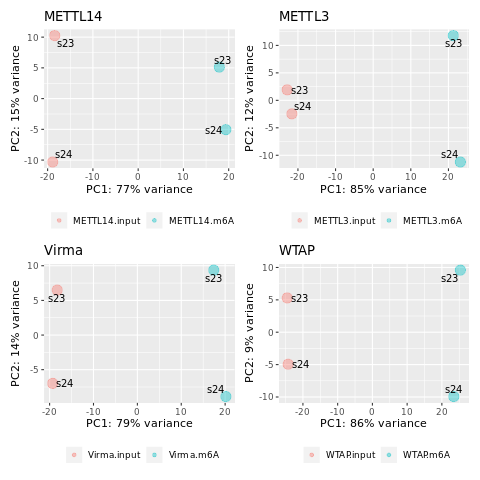

In [94]:
%%R
for (treat in c('METTL14','METTL3','Virma','WTAP')){
    dds = all_dds[[treat]]
    res <- results(dds)    
    cds <- estimateDispersions(dds)
    vsd <- varianceStabilizingTransformation(cds)
    ## PCA Plot 
    z <- plotPCA(vsd,intgroup=c("cond"), returnData=TRUE)
    z$rep <- substr(z$name,1,3)
    percentVar <- round(100 * attr(z, "percentVar"))
    pca[[treat]] <- ggplot(z, aes(PC1, PC2)) +
            ggtitle(treat) + 
            geom_point(aes(size = 2,  colour=cond), alpha = 4/10) +
            geom_text_repel(aes(label = rep),size = 3.5) +
            xlab(paste0("PC1: ",percentVar[1],"% variance")) +
            ylab(paste0("PC2: ",percentVar[2],"% variance")) +
            guides(size = FALSE) +
            theme(
                legend.title = element_blank(), 
                legend.position = "bottom"  )
}    
p = pca$METTL14 + pca$METTL3 + pca$Virma + pca$WTAP
ggsave("plots/all_PCAs.png", plot = p, device = 'png', dpi = 300)
ggsave("plots/all_PCAs.pdf", plot = p, device = 'pdf', dpi = 300)
p

R[write to console]: Saving 6.67 x 6.67 in image

R[write to console]: Saving 6.67 x 6.67 in image



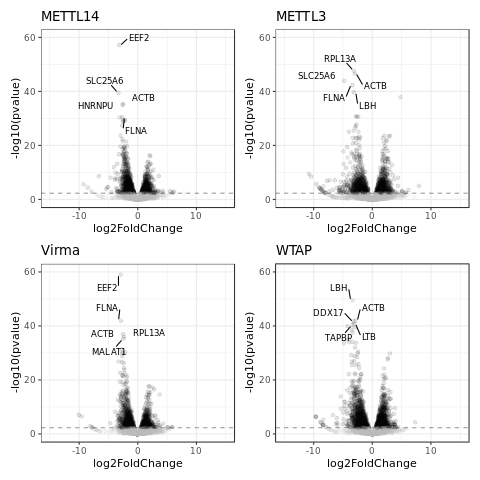

In [95]:
%%R
for (treat in c('METTL14','METTL3','Virma','WTAP')){
    dds = all_dds[[treat]]
    res <- results(dds)    
    res <- data.frame(res)
    # idtransfer
    peak_ids = strsplit(rownames(m), '_',)
    ids = unlist(lapply(peak_ids, '[[', 1))
    res$name = gtf_df[ids,]
    # significant thr 
    pvalue_lim = 0.005 #; log2FoldChange_lim = 5
    res$sig <- as.factor(
        res$pvalue < pvalue_lim
#         (res$log2FoldChange > log2FoldChange_lim & res$pvalue < pvalue_lim) |
#         (res$log2FoldChange < (-1)*log2FoldChange_lim & res$pvalue < pvalue_lim)
    )
    relevel(res$sig, ref=TRUE)
#     ## Volcano plot
    vol[[treat]] = res %>% ggplot(aes(x=log2FoldChange, y=-log10(pvalue),colour=sig, fill=sig)) +
            geom_point(aes(color = sig),alpha = 1/10) +
            ggtitle(treat) +
            xlim(c(-15,15)) +
            ylim(c(0,60)) +
            geom_hline(yintercept=-log10(pvalue_lim), linetype="dashed", alpha = 4/10) +
#             geom_vline(xintercept=log2FoldChange_lim, linetype="dashed", alpha = 4/10) +
#             geom_vline(xintercept=(-1)*log2FoldChange_lim, linetype="dashed", alpha = 4/10) +
            scale_color_manual(values = c("grey", "black")) +
            theme_bw() + theme(legend.position="none") +
            geom_text_repel(
                data = subset(res[order(res$pvalue),], sig == TRUE)[1:5,],
                aes(label = name),
                size = 3,
                box.padding = unit(0.35, "lines"),
                point.padding = unit(0.3, "lines")
            )
}
v = vol$METTL14 + vol$METTL3 + vol$Virma + vol$WTAP
ggsave("plots/all_Volcanos.png", plot = v, device = 'png', dpi = 300)
ggsave("plots/all_Volcanos.pdf", plot = v, device = 'pdf', dpi = 300)
v

[Wilcoxon signed rank test](http://www.sthda.com/english/wiki/one-sample-wilcoxon-signed-rank-test-in-r)

[1] "METTL14"

	Wilcoxon signed rank test with continuity correction

data:  res$log2FoldChange
V = 14397000, p-value = 0.9007
alternative hypothesis: true location is less than 0

[1] "METTL3"

	Wilcoxon signed rank test with continuity correction

data:  res$log2FoldChange
V = 13900000, p-value = 0.09782
alternative hypothesis: true location is less than 0

[1] "Virma"

	Wilcoxon signed rank test with continuity correction

data:  res$log2FoldChange
V = 14295000, p-value = 0.7599
alternative hypothesis: true location is less than 0

[1] "WTAP"

	Wilcoxon signed rank test with continuity correction

data:  res$log2FoldChange
V = 13781000, p-value = 0.02159
alternative hypothesis: true location is less than 0



R[write to console]: Saving 6.67 x 6.67 in image

R[write to console]: Saving 6.67 x 6.67 in image



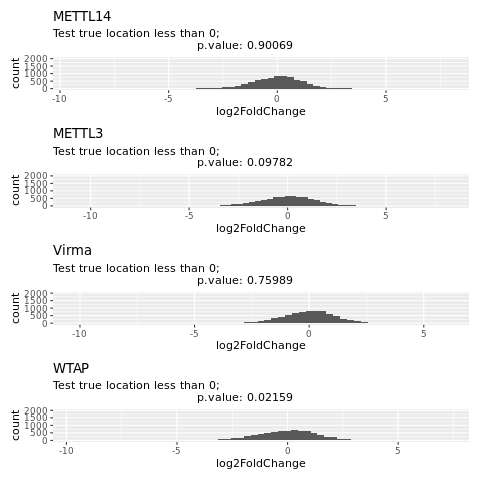

In [96]:
%%R
for (treat in c('METTL14','METTL3','Virma','WTAP')){
    dds = all_dds[[treat]]
    res <- results(dds)    
    res = data.frame(res)
    d <- res$log2FoldChange[!is.na(res$log2FoldChange)]
    t <- wilcox.test(res$log2FoldChange,mu = 0, alternative = "less")
    
    print (treat)
    print (t)
    hist[[treat]] = ggplot(res, aes(x=log2FoldChange)) +
            ggtitle(treat, sprintf("Test true location less than 0;\
                                    p.value: %.5f", t$p.value)) +
            ylim(c(-10,2000)) +
            geom_histogram(binwidth=0.3)
}
h = hist$METTL14 / hist$METTL3 / hist$Virma / hist$WTAP
ggsave("plots/all_Histograms.png", plot = h, device = 'png', dpi = 300)
ggsave("plots/all_Histograms.pdf", plot = h, device = 'pdf', dpi = 300)
h

## Pairwise correlation of each treatments 
http://www.sthda.com/english/wiki/correlation-matrix-a-quick-start-guide-to-analyze-format-and-visualize-a-correlation-matrix-using-r-software

In [97]:
%%R
library(Hmisc)
library(corrplot)
library(pheatmap)

R[write to console]: Loading required package: lattice

R[write to console]: Loading required package: survival

R[write to console]: Loading required package: Formula

R[write to console]: 
Attaching package: 'Hmisc'


R[write to console]: The following objects are masked from 'package:Biostrings':

    mask, translate


R[write to console]: The following objects are masked from 'package:dplyr':

    src, summarize


R[write to console]: The following object is masked from 'package:Biobase':

    contents


R[write to console]: The following objects are masked from 'package:base':

    format.pval, units


R[write to console]: corrplot 0.84 loaded



In [98]:
%%R
all_fc = data.frame(
    METTL14 = data.frame(results(all_dds$METTL14))$log2FoldChange,
    METTL3 = data.frame(results(all_dds$METTL3))$log2FoldChange,
    Virma = data.frame(results(all_dds$Virma))$log2FoldChange,
    WTAP = data.frame(results(all_dds$WTAP))$log2FoldChange,
    row.names = rownames(data.frame(results(all_dds[[1]])))
)
colSums(is.na(all_fc))

METTL14  METTL3   Virma    WTAP 
      5       8       3       3 


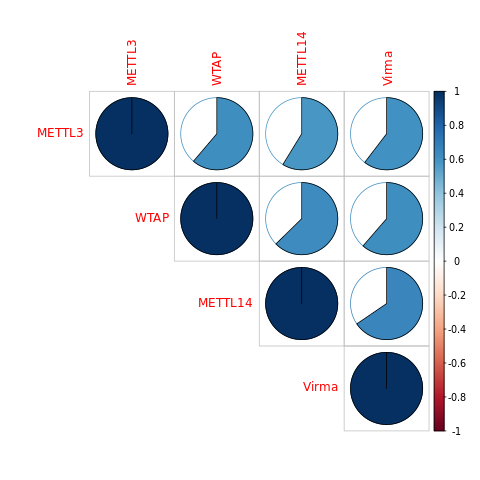

In [99]:
%%R
res2 <- rcorr(as.matrix(all_fc))
# # Extract the correlation coefficients
# res2$r
# # Extract p-values
# res2$P

# pdf("plots/Corrplot.pdf", width=7, height=7)
c = corrplot(res2$r, type="upper", order="hclust", method="pie",
         p.mat = res2$P, sig.level = 0.01, insig = "blank")
# dev.off()
# png("plots/Corrplot.png")
# c = corrplot(res2$r, type="upper", order="hclust", method="pie",
#          p.mat = res2$P, sig.level = 0.01, insig = "blank")
# dev.off()

In [100]:
%%R
res2$r

          METTL14    METTL3     Virma      WTAP
METTL14 1.0000000 0.5874376 0.6548376 0.6265873
METTL3  0.5874376 1.0000000 0.6038699 0.6120947
Virma   0.6548376 0.6038699 1.0000000 0.6135741
WTAP    0.6265873 0.6120947 0.6135741 1.0000000


R[write to console]: Saving 6.67 x 6.67 in image

R[write to console]: Saving 6.67 x 6.67 in image



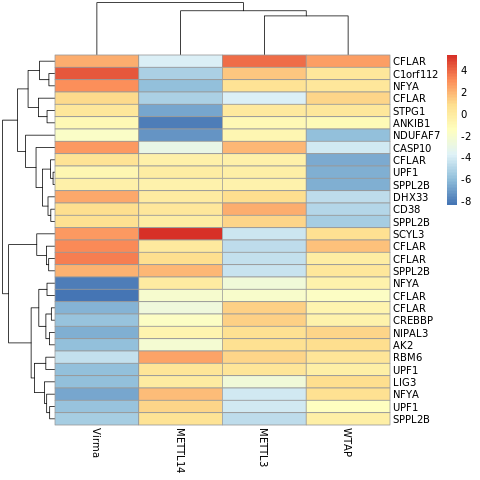

In [104]:
%%R
# mostVar Calculate the top n most variable genes in a matrix of gene expression data
# https://rdrr.io/github/abc-igmm/transcripTools/man/mostVar.html
mostVar <- function(data, n, i_want_most_var = TRUE) {
  data.var <- apply(data, 1, stats::var)
  data[order(data.var, decreasing = i_want_most_var)[1:n],] 
}
# scale - Z-Score
fc <- data.frame(apply(all_fc,2,scale, center=TRUE, scale=TRUE), row.names=rownames(all_fc))

# idtransfer
peak_ids = strsplit(rownames(all_fc), '_',)
ids = unlist(lapply(peak_ids, '[[', 1))

# filter most variable genes
fc = mostVar(fc,30)
# Plot heatmap
h1 <- pheatmap(fc, labels_row = gtf_df[ids,])
ggsave('plots/All_Heatmap.png', plot = h1, device = 'png', dpi = 300)
ggsave('plots/All_Heatmap.pdf', plot = h1, device = 'pdf', dpi = 300)

In [567]:
%%R
METTL14 = data.frame(results(all_dds$METTL14))$log2FoldChange
    METTL3 = data.frame(results(all_dds$METTL3))$log2FoldChange,
    Virma = data.frame(results(all_dds$Virma))$log2FoldChange,
    WTAP = data.frame(results(all_dds$WTAP))$log2FoldChange,
    row.names = rownames(data.frame(results(all_dds[[1]])))


                           baseMean log2FoldChange     lfcSE       stat
ENSG00000000457.13_peak   196.00988     0.06033898 0.5081979 0.11873127
ENSG00000000460.16_peak   198.59638     0.02176006 0.5010831 0.04342605
ENSG00000001167.14_peak   103.93295     0.84273849 0.7820868 1.07755104
ENSG00000001167.14_peak_2 271.19612     0.71343965 0.4793855 1.48823796
ENSG00000001167.14_peak_3 265.14815     0.83972933 0.4425370 1.89753490
ENSG00000001460.17_peak    24.82376     1.24206963 1.3171857 0.94297230
                              pvalue      padj     name   sig
ENSG00000000457.13_peak   0.90548826 0.9449638    SCYL3 FALSE
ENSG00000000460.16_peak   0.96536191 0.9800442 C1orf112 FALSE
ENSG00000001167.14_peak   0.28123416 0.4414035     NFYA FALSE
ENSG00000001167.14_peak_2 0.13668815 0.2663175     NFYA FALSE
ENSG00000001167.14_peak_3 0.05775738 0.1397531     NFYA FALSE
ENSG00000001460.17_peak   0.34569507 0.5112516    STPG1 FALSE


## iPAGE

In [266]:
# %%bash 
# declare -a StringArray=('METTL14' 'METTL3' 'Virma' 'WTAP')
# # bedgraphs using bedtools 
# for treat in "${StringArray[@]}"; do
#     for f in `ls -d /flash/hani/bin/iPAGEv1.0/PAGE_DATA/ANNOTATIONS/human_ensembl*`; do
#         base=`basename "$f"`
#     #     echo "perl $PAGEDIR/page.pl --expfile=delta.stbl.u_vs_t.txt --species=$base --exptype=continuous --ebins=11 --nodups=1"
#         echo "mv ${treat}delta.stbl.u_vs_t.txt_PAGE ipage/delta.stbl.u_vs_t.txt_${base}_PAGE"
#     #     perl $PAGEDIR/page.pl --expfile=delta.stbl.u_vs_t.txt --species=$base --exptype=continuous --ebins=11 --nodups=1
#     #     mv delta.stbl.u_vs_t.txt_PAGE ipage/delta.stbl.u_vs_t.txt_${base}_PAGE
#     done
    
# done


### using bam to bed for cov count 

1. `intersectBed -split` make it work with bed12 file

3. make a intersect gtf to extract names for later. `

In [108]:
# %%bash 
# bamToBed -i bam/s23.human.METTL3.input.bam | intersectBed -s -split -wo -a - -b exomepeak/control/peak.bed | awk '{print $10}' | sort  tail

In [109]:
# %%bash 
# bamToBed -i bam/s23.human.METTL3.input.bam | intersectBed -s -split -wo -a - -b exomepeak/control/peak.bed \
# | cut -f10 | sort | uniq -c | awk '{ print $2 "\t" $1}' | head

# HIV

### Peak calling for HIV genome using exomePeak

In [532]:
!ls bam/*hiv*bam

bam/s23.hiv.METTL14.input.bam  bam/s24.hiv.METTL14.input.bam
bam/s23.hiv.METTL14.m6A.bam    bam/s24.hiv.METTL14.m6A.bam
bam/s23.hiv.METTL3.input.bam   bam/s24.hiv.METTL3.input.bam
bam/s23.hiv.METTL3.m6A.bam     bam/s24.hiv.METTL3.m6A.bam
bam/s23.hiv.NT.input.bam       bam/s24.hiv.NT.input.bam
bam/s23.hiv.NT.m6A.bam	       bam/s24.hiv.NT.m6A.bam
bam/s23.hiv.Virma.input.bam    bam/s24.hiv.Virma.input.bam
bam/s23.hiv.Virma.m6A.bam      bam/s24.hiv.Virma.m6A.bam
bam/s23.hiv.WTAP.input.bam     bam/s24.hiv.WTAP.input.bam
bam/s23.hiv.WTAP.m6A.bam       bam/s24.hiv.WTAP.m6A.bam


In [1]:
%load_ext rpy2.ipython

In [534]:
%%R
library(exomePeak)

In [547]:
%%R
GENE_ANNO_GTF="/rumi/shams/abe/People/Judd/HIV/EU541617.1/EU541617.1.gff3"
txdb = makeTxDbFromGFF(GENE_ANNO_GTF)

setwd("~/People/Judd/bam")
res <- exomepeak(
    TXDB = txdb,
    IP_BAM=list.files(pattern='hiv.NT.m6A.bam$'),
    INPUT_BAM=list.files(pattern='hiv.NT.input.bam$'),
    OUTPUT_DIR='../exomepeak/',
    EXPERIMENT_NAME='hiv.control'
)
# saveRDS(res, '../exomepeak/hiv.control/results.rds')
# setwd("~/People/Judd")

R[write to console]: Import genomic features from the file as a GRanges object ... 
R[write to console]: OK

R[write to console]: Prepare the 'metadata' data frame ... 
R[write to console]: OK

R[write to console]: Make the TxDb object ... 
R[write to console]: OK

R[write to console]: 'select()' returned 1:many mapping between keys and columns



[1] "Divide transcriptome into chr-gene-batch sections ..."
[1] "Get Reads Count ..."
[1] "This step may take a few hours ..."
[1] "100 %"
[1] "Get all the peaks ..."


R[write to console]: Error in .subset2(x, i, exact = exact) : subscript out of bounds
Calls: <Anonymous> ... .report.peak.based.on.result -> [[ -> [[.data.frame -> <Anonymous>




Error in .subset2(x, i, exact = exact) : subscript out of bounds
Calls: <Anonymous> ... .report.peak.based.on.result -> [[ -> [[.data.frame -> <Anonymous>


In [555]:
%%R
exomepeak

function (IP_BAM, INPUT_BAM, GENOME = NA, UCSC_TABLE_NAME = "knownGene", 
    GENE_ANNO_GTF = NA, TXDB = NA, TREATED_IP_BAM = character(0), 
    TREATED_INPUT_BAM = character(0), OUTPUT_DIR = NA, EXPERIMENT_NAME = "exomePeak_output", 
    WINDOW_WIDTH = 200, SLIDING_STEP = 30, FRAGMENT_LENGTH = 100, 
    READ_LENGTH = NA, MINIMAL_PEAK_LENGTH = FRAGMENT_LENGTH/2, 
    PEAK_CUTOFF_PVALUE = NA, PEAK_CUTOFF_FDR = 0.05, FOLD_ENRICHMENT = 1, 
    CONSISTENT_PEAK_CUTOFF_PVALUE = 0.05, CONSISTENT_PEAK_FOLD_ENRICHMENT = 1, 
    DIFF_PEAK_METHOD = "rhtest", DIFF_PEAK_CUTOFF_PVALUE = NA, 
    DIFF_PEAK_CUTOFF_FDR = 0.05, DIFF_PEAK_ABS_FOLD_CHANGE = 1, 
    DIFF_PEAK_CONSISTENT_CUTOFF_PVALUE = 0.05, DIFF_PEAK_CONSISTENT_ABS_FOLD_CHANGE = 1, 
    MINIMAL_MAPQ = 30, REMOVE_LOCAL_TAG_ANOMALITIES = TRUE, POISSON_MEAN_RATIO = 1, 
    TESTING_MODE = NA, SAVE_RESULT_ON_DISK = TRUE) 
{
    PARAMETERS = list()
    PARAMETERS$GENE_ANNO_GTF = GENE_ANNO_GTF
    PARAMETERS$IP_BAM = IP_BAM
    PARAMETERS$INPUT_

# Run piranha for HIV bam files 

In [577]:
%%bash
### m6A bam files ###
# Merge .bam files:
# samtools merge -f -@ 12 piranha/hiv.m6A.bam bam/*hiv*m6A.bam
# sort the merged file >>> it's not making any change
# samtools sort -@ 12 piranha/hiv.m6A.bam > piranha/hiv.m6A.srt.bam
# bam to bed
bedtools bamtobed -split -bed12 -i piranha/hiv.m6A.srt.bam > piranha/hiv.m6A.srt.bed

In [579]:
%%bash 
### input bam files ###
# Merge .bam files:
samtools merge -f -@ 12 piranha/hiv.input.bam bam/*hiv*input.bam
# sort the merged file >>> it's not making any change
samtools sort -@ 12 piranha/hiv.input.bam > piranha/hiv.input.srt.bam
# bam to bet
bedtools bamtobed -split -bed12 -i piranha/hiv.input.srt.bam > piranha/hiv.input.srt.bed

[bam_sort_core] merging from 0 files and 12 in-memory blocks...


In [583]:
%%bash 
### run Piranha ###
# Piranha -s -i 50 piranha/hiv.m6A.srt.bed piranha/hiv.input.srt.bed -o piranha/hiv.piranha.txt
# make new ref file
awk '{printf("%s\t%d\t%d\t%d\t1\t%s\n",$1,$2,$3, NR,$4)}' piranha/hiv.piranha.txt > piranha/final_piranha.bed
awk 'NR>1{printf("%s\t%s\t%d\t%d\t%s\n",$4-1,$1,$2+1,$3,$6)}' piranha/final_piranha.bed > piranha/final_piranha.saf
### first line of piranha/final_piranha.saf removed manually 

In [584]:
# %%bash
# cat exomepeak/control/peak.bed | sort -k4 | \
# # rename features peak by peak
# awk -F "\t" '{OFS=FS}NR>1{$4=$4"_peak"}; cnt[$4]++{$4=$4"_"cnt[$4]} 1' | \
# # bed12 to gtf
# perl ../../Workflows/bed12ToGTF/bed12ToGTF.1.pl | \
# awk '{gsub(/\"|\;/,"")}1''{gsub(/transcript_id/,"gene_id")}1''{gsub(/ exon_number [[:digit:]]/,"")}1' > exomepeak/control/peak.gtf

Using `featureCounts` to count reads which are present in control peak cordinates (found by `piranha`). 

In [580]:
# %%bash
# declare -a StringArray=('METTL14' 'METTL3' 'Virma' 'WTAP')
# for enz in "${StringArray[@]}"; 
#     do for f in bam/*human.$enz*.bam; 
#         do out=${f/.bam/.fc}; out=${out/bam/peakcount}; 
#             featureCounts -T 12 -O -t exon -g gene_id -a exomepeak/control/peak.gtf -o $out $f; 
#     done;
# done

In [586]:
%%bash
# make new reletive counts
for f in bam/*hiv*.m6A.bam; do
    out=${f/.bam/.piranha.fc};
    out=${out/bam/piranha\/fc};
    featureCounts -T 12 -O -F SAF -a piranha/final_piranha.saf -o $out $f;
done

for f in bam/*hiv*.input.bam; do
    out=${f/.bam/.piranha.fc};
    out=${out/bam/piranha\/fc};
    featureCounts -T 12 -O -F SAF -a piranha/final_piranha.saf -o $out $f;
done


        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
	  v1.6.0

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 1 BAM file                                       ||
||                           S bam/s23.hiv.METTL14.m6A.bam                    ||
||                                                                            ||
||             Output file : piranha/fc/s23.hiv.METTL14.m6A.piranha.fc        ||
||                 Summary : piranha/fc/s23.hiv.METTL14.m6A.piran

In [2]:
%reload_ext rpy2.ipython

In [4]:
%%R
library(DESeq2)
library(ggplot2)
library(tidyverse)
library(pheatmap)

In [5]:
%%R
files <- list.files(path = "piranha/fc", pattern="fc$") 
reps <- c(rep('s23',10),rep('s24',10))
ip <- rep(c('input','m6A'),10)
enzymes <- rep(unlist(lapply(c('METTL14','METTL3','NT','Virma','WTAP'), rep, 2)),2)
conds <- ip
all_conds <- paste(
    reps,
    enzymes, 
    ip, 
    sep='.')
datalist <- lapply(files, function(x){read.table(file=paste('piranha/fc/', x, sep = "") ,header=TRUE,colClasses=c(NA, "NULL", "NULL", "NULL", "NULL", "NULL", NA),check.names=F)})
m <- Reduce(function(...) merge(..., by=1, all = TRUE), datalist)
rownames(m) <- paste ('hiv',m[,1],sep='-')
m <- m[,-1]
m[is.na(m)]<-0
m <- round(m)
colnames(m) <- all_conds
colData <- data.frame(cond = conds, row.names=colnames(m))

comparing m6A/input for each knockdown to control


In [6]:
%%R
options(repr.plot.width=4, repr.plot.height=4)
all_vsd = list()
for (enz in c('METTL14','METTL3','Virma','WTAP')){
    icond = c(grep(enz,all_conds), grep('NT',all_conds) )
    mm <- m[,icond]
    colData <- data.frame(cond= conds[icond], row.names=colnames(mm))
    dds <- DESeqDataSetFromMatrix(countData = mm, colData = colData, design = ~ cond)
    dds$cond <- relevel(dds$cond, ref='input')
    dds <- DESeq(dds)
    cds <- estimateDispersions(dds)
    vsd <- varianceStabilizingTransformation(cds)
    # Plot heatmap
    
    vsd_mat <- assay(vsd)
    df = data.frame(vsd_mat)
    colnames(df) = c(
        's23.treat.input','s23.treat.m6A','s24.treat.input','s24.treat.m6A',
        's23.NT.input','s23.NT.m6A','s24.NT.input','s24.NT.m6A'
    )
    rownames(df) = paste(enz,rownames(df),sep='_')
    all_vsd[[enz]] = df
    # save scales to normalize peak visulization with GViz 
    dds <- estimateSizeFactors(dds)
    scale_df <- data.frame('scale' = 1/sizeFactors(dds))
    write.table(scale_df, paste("bigwig/hiv/",enz,"/scale.txt", sep=''), sep="\t", quote=FALSE, col.names=NA)
}

R[write to console]: converting counts to integer mode

R[write to console]: estimating size factors

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing

R[write to console]: found already estimated dispersions, replacing these

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: -- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.

R[write to console]: converting counts to integer mode

R[write to console]: estimating size factors

R[write to console]: estimating dispersions

R[write to conso

R[write to console]: Saving 6.67 x 6.67 in image

R[write to console]: Saving 6.67 x 6.67 in image



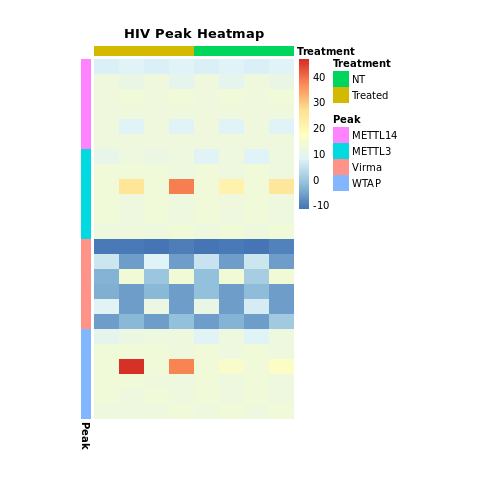

In [81]:
%%R

mat <-do.call('rbind',all_vsd)
# Data frame with column annotations.
mat_col <- data.frame(Treatment = c(rep('Treated',4),rep('NT',4)))
mat_row <- data.frame(Peak = c(rep('METTL14', 6), rep('METTL3', 6), rep('Virma', 6), rep('WTAP', 6) ))
rownames(mat_col) <- colnames(mat)
rownames(mat_row) <- rownames(mat)

h = pheatmap(
    mat               = mat,
    border_color      = NA,
    show_colnames     = FALSE,
    show_rownames     = FALSE,
    annotation_col    = mat_col,
    annotation_row    = mat_row,
    fontsize          = 10,
    cluster_rows = FALSE, cluster_cols=FALSE,cellwidth = 25, cellheight = 15,
  main              = "HIV Peak Heatmap"
)
ggsave("plots/hiv.peak_Heatmaps.png", plot = h, device = 'png', dpi = 300)
ggsave("plots/hiv.peak_Heatmaps.pdf", plot = h, device = 'pdf', dpi = 300)

## Plot peak cordinates 

making `bigwig` file from `bam` files to visualize genome coverage of peak coordinates of hiv genome. 

In [77]:
%%bash 
declare -a StringArray=('METTL14' 'METTL3' 'Virma' 'WTAP')
# mkdir bedgraph/hiv/
# for treat in "${StringArray[@]}"; do mkdir bedgraph/hiv/$treat; done

# normalize 
# # bigwigs 
# for treat in "${StringArray[@]}"; do
#     awk '!(NR<=1){gsub(/s2[3-4]./,substr($1, 0, 4)"hiv.");print "bamCoverage --scaleFactor "$2" -b bam/"$1".bam -o bigwig/'$treat'/"$1".bw"}' bigwig/$treat/scale.txt # | bash
# done

# bedgraphs using bedtools 
for treat in "${StringArray[@]}"; do
    awk '!(NR<=1){gsub(/s2[3-4]./,substr($1, 0, 4)"hiv.");print "bedtools genomecov -bga -scale "$2" -ibam bam/"$1".bam > bedgraph/hiv/'$treat'/"$1".bg"}' bigwig/hiv/$treat/scale.txt | bash
done

mkdir: cannot create directory ‘bedgraph/hiv/’: File exists


In [54]:
%reload_ext rpy2.ipython

In [56]:
%%R 
library(Gviz)
library(Rsamtools)
library(data.table)
library(Biostrings)
library(rtracklayer)

In [82]:
%%R
# fa <- FaFile(file='HIV/HIV.fa'); idx <- scanFaIndex(fa)
# genome(idx) <- 'HIV'; gen = genome(idx)
# https://support.bioconductor.org/p/91850/
hiv_dna <- readDNAStringSet("HIV/EU541617.1/EU541617.1.fasta")
names(hiv_dna) <- 'chr1'
# export(hiv_dna, "HIV/HIV.fa.2bit")
# hiv <- TwoBitFile("HIV/HIV.fa.2bit")

# read HIV genome 
hiv_peaks <- read.table(file="piranha/final_piranha.saf", sep="\t", row.names = 1)[-c(1,4)]
colnames(hiv_peaks) <- c('start', 'end')
hiv_gr <- GRanges(seqnames="chr1", range=IRanges(start=hiv_peaks$start, end=hiv_peaks$end),strand='*')
names(hiv_gr) <- paste('peak', 1:6, sep='-')
genome(hiv_gr) <- 'HIV'; gen<- 'HIV'
chr <- as.character(unique(seqnames(hiv_gr)))
# finding peak cordinate sequences 
hiv_gr$sequence = ''
for (i in 1:6){ hiv_gr$sequence[i] <- as.character (hiv_dna$chr1[start(hiv_gr)[i]:end(hiv_gr)[i]]) }

In [83]:
%%R 
hiv_gr

GRanges object with 6 ranges and 1 metadata column:
         seqnames    ranges strand |
            <Rle> <IRanges>  <Rle> |
  peak-1     chr1      1-50      * |
  peak-2     chr1 7801-8050      * |
  peak-3     chr1 8101-8250      * |
  peak-4     chr1 8301-8350      * |
  peak-5     chr1 8651-8750      * |
  peak-6     chr1 8951-9150      * |
                                                                                                                                                                                                                                                           sequence
                                                                                                                                                                                                                                                        <character>
  peak-1                                                                                                                            

using normalized `bedgraph` and making `Gviz` tracks 

In [84]:
%%R
for (treat in c('METTL14','METTL3','Virma','WTAP')){
    reps <- c(rep('s23',2),rep('s24',2))
    ip <- rep(c('input','m6A'),2)
    conds <- paste(reps,treat, sep='.')
    # absolute path to bigwig files  
    bw_files.treated <- paste('bedgraph/hiv/',treat,'/',reps,'.hiv.',treat,'.',ip,'.bg', sep='')
    bw_files.nontreated <- paste('bedgraph/hiv/',treat,'/',reps,'.hiv.NT.',ip,'.bg', sep='')
    for (i in c(2,4)){
        ### read bigwig files
        #-- treated tracks --#
        # m6A track           
        bw_ip.treated <- import.bedGraph(bw_files.treated[i]) #,as="GRanges")
        genome(bw_ip.treated) <- 'HIV'
        seqlevels(bw_ip.treated) <- 'chr1'
        # input track
        bw_in.treated <- import.bedGraph(bw_files.treated[i-1]) #,as="GRanges")
        genome(bw_in.treated) <- 'HIV'
        seqlevels(bw_in.treated) <- 'chr1'
        # Overlay input and m6A
        dtrack_ip.treated <- DataTrack(bw_ip.treated,chomosome="chr1", name='Treated')
        dtrack_in.treated <- DataTrack(bw_in.treated,chomosome="chr1", groups = factor('input',levels = c('input','m6A')) )
        displayPars(dtrack_ip.treated) <- list(groups = factor('m6A',levels = c('input','m6A')), legend = TRUE)
        assign(paste('treated', conds[i],sep='.'), 
               OverlayTrack(trackList=list(dtrack_ip.treated,dtrack_in.treated)))
        #-- non-treated tracks --#
        # m6A track
        bw_ip.nontreated <- import.bedGraph(bw_files.nontreated[i]) # ,as="GRanges")
        genome(bw_ip.nontreated) <- 'HIV'
        seqlevels(bw_ip.nontreated) <- 'chr1'
        # input track
        bw_in.nontreated <- import.bedGraph(bw_files.nontreated[i-1]) # ,as="GRanges")
        genome(bw_in.nontreated) <- 'HIV'
        seqlevels(bw_in.nontreated) <- 'chr1'
        # Overlay input and m6A
        dtrack_ip.nontreated <- DataTrack(bw_ip.nontreated,chomosome="chr1", name='Non-treated')
        dtrack_in.nontreated <- DataTrack(bw_in.nontreated,chomosome="chr1", groups = factor('input',levels = c('input','m6A')) )
        displayPars(dtrack_ip.nontreated) <- list(groups = factor('m6A',levels = c('input','m6A')), legend = TRUE, name = 'Non treated')
        assign(paste('nontreated',conds[i],sep='.'), 
               OverlayTrack(trackList=list(dtrack_ip.nontreated,dtrack_in.nontreated),
                            background.panel = "#FFFEDB", background.title = "darkblue"))
    }
}

grtrack <- GeneRegionTrack(hiv_gr, genome = gen, chromosome = chr, name = "Gene Model")
gtrack <- GenomeAxisTrack()

and here is the final function that plot the peaks that `piranha` found earlier `:)` 

In [85]:
%%R
peak_ploter <- function(treat,ymax, mins = rep(50,6), plus = rep(50,6), saveplot = '' ){
    for (i in 1:6){
        if (saveplot == 'pdf') pdf(paste("plots/hiv.",treat,'.',names(hiv_gr)[i],".pdf",sep=''), width=7, height=7, paper = "a4r")
        if (saveplot == 'png') png(paste("plots/hiv.",treat,'.',names(hiv_gr)[i],".png",sep=''))
        plotTracks(
            list (gtrack, grtrack,
                  get (paste('treated.s23', treat, sep ='.')),get(paste('treated.s24', treat, sep ='.')),
                  get (paste('nontreated.s23', treat,sep ='.')),get(paste('nontreated.s24', treat,sep ='.'))
                 ), 
            type="l",
            from=start(hiv_gr)[i] - mins[i], to=end(hiv_gr)[i] + plus[i] , ylim= c(-100,ymax[i]), 
            main = paste(treat, names(hiv_gr)[i]),
            add53=T,chromosome = "chr1",cex=1)
        if (saveplot != '') dev.off() 
    }
}

In [87]:
%%R
treat = 'METTL14'
ymax = c(1e3,6e3,1.5e4,1e4,8e3,4e3)
p = peak_ploter (treat,ymax, saveplot='pdf')
p = peak_ploter (treat,ymax, saveplot='png')

treat = 'METTL3'
ymax = c(1e3,8e3,1e4,8e3,8e3,4e3)
p = peak_ploter (treat,ymax, saveplot='pdf')
p = peak_ploter (treat,ymax, saveplot='png')

treat = 'Virma'
ymax = c(1e3,6e3,1e4,8e3,6e3,4e3)
p = peak_ploter (treat,ymax, saveplot='pdf')
p = peak_ploter (treat,ymax, saveplot='png')

treat = 'WTAP'
ymax = c(1e3,5e3,1e4,1e4,6e3,3e3)
p = peak_ploter (treat,ymax, saveplot='pdf')
p = peak_ploter (treat,ymax, saveplot='png')

## Similar paper 
> [Dynamics of the human and viral m6 A RNA methylomes during HIV-1 infection of T cells](https://www.nature.com/articles/nmicrobiol201611.pdf?proof=t)
[GEO](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE74016)

They’re using [pLAI.2 HIV](https://aidsreagent.org/reagentdetail.cfm?t=molecular_clones&id=47) but Judd have used [HIV-1 IIIB Virus](https://aidsreagent.org/reagentdetail.cfm?t=viruses&id=607)

Data in this paper might be useful to compare it with Judd’s data. They have used different pipelines to analyze data at that time. I'm downloading data using [SRA Toolkit](https://www.ncbi.nlm.nih.gov/sra/docs/sradownload/#download-sequence-data-files-usi)


https://trace.ncbi.nlm.nih.gov/Traces/sra/?study=SRP064809

In [ ]:
%%bash 
STAR --genomeLoad LoadAndExit --genomeDir /rumi/shams/abe/genomes/hg38/
mkdir peer/bam
for f in peer/fastq/*;do
    out=${f/fastq/bam};
    echo STAR --outSAMtype BAM SortedByCoordinate --runThreadN 16 --genomeDir /rumi/shams/abe/genomes/hg38/ --readFilesIn $f --outFileNamePrefix $out.bam --outReadsUnmapped Fastx;
done
STAR --genomeLoad Remove --genomeDir /rumi/shams/abe/genomes/hg38/

In [89]:
%%R 
sessionInfo()

R version 3.5.1 (2018-07-02)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 18.04.2 LTS

Matrix products: default
BLAS/LAPACK: /rumi/shams/abe/anaconda3/envs/deseq/lib/R/lib/libRlapack.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
 [1] grid      parallel  stats4    tools     stats     graphics  grDevices
 [8] utils     datasets  methods   base     

other attached packages:
 [1] rtracklayer_1.40.6          data.table_1.11.6          
 [3] Rsamtools_1.32.3            Biostrings_2.48.0          
 [5] XVector_0.20.0              Gviz_1.24.0                
 [7] pheatmap_1.0.12             forcats_0.4.0              
 [9] stringr